In [1]:
#@python 3.8.10
#@author moon ying
#plot continuum membrane results with matplotlib 3d plot and trimesh package
#dependencies are listed as follows

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import trimesh as tr
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

In [2]:
vertices = pd.read_csv("vertex999.csv", header = None)
vertices.columns = ["x","y","z"]
vertices

,x,y,z
0,-89.0118,-90.0760,13.9986
1,-87.0079,-90.0732,13.9991
2,-85.0060,-90.0715,13.9995
3,-83.0024,-90.0683,13.9998
4,-81.0000,-90.0666,14.0000
...,...,...,...
9550,83.0000,90.0666,14.0000
9551,85.0000,90.0666,14.0000
9552,87.0000,90.0666,14.0000
9553,89.0000,90.0666,14.0000


Text(0.5, 0, 'Z')

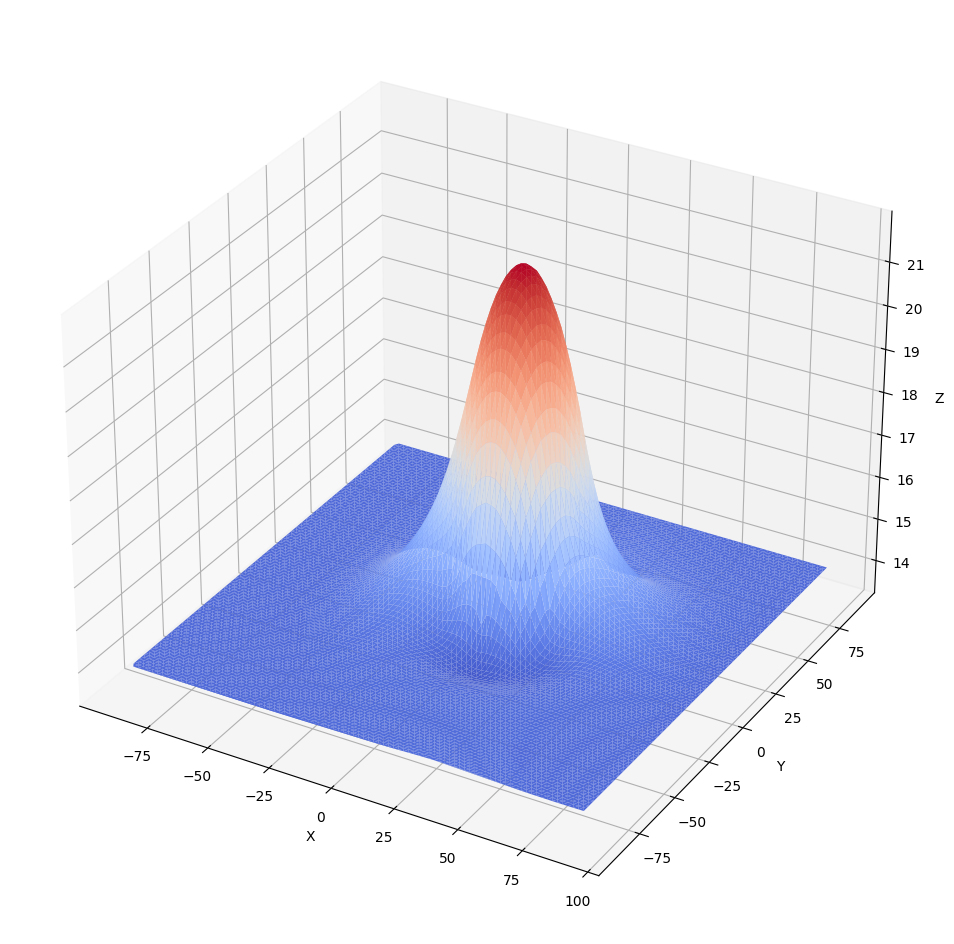

In [3]:
fig = plt.figure(figsize=(24, 12))
ax = plt.axes(projection='3d')

#ax.scatter3D(vertices["x"], vertices["y"], vertices["z"], c = vertices["z"], s = 16.0);

#fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Plot the surface.
surf = ax.plot_trisurf(vertices["x"], vertices["y"], vertices["z"], cmap=cm.coolwarm)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

In [4]:
gags = pd.read_csv("213gags_COM.csv", header = None)
gags.columns = ["x","y","z"]
gags["z"] += 10
gags

,x,y,z
0,5.5818,3.2942,9.5798
1,-2.4391,-12.0954,8.4666
2,-10.7714,14.5952,6.6067
3,4.6183,8.6624,9.0277
4,-0.4618,7.8297,9.3871
...,...,...,...
208,1.7022,-25.4569,3.0132
209,-0.1907,-27.2594,1.9313
210,17.8243,-14.6680,4.3469
211,14.6345,-10.0529,6.7389


Text(0.5, 0, 'Z')

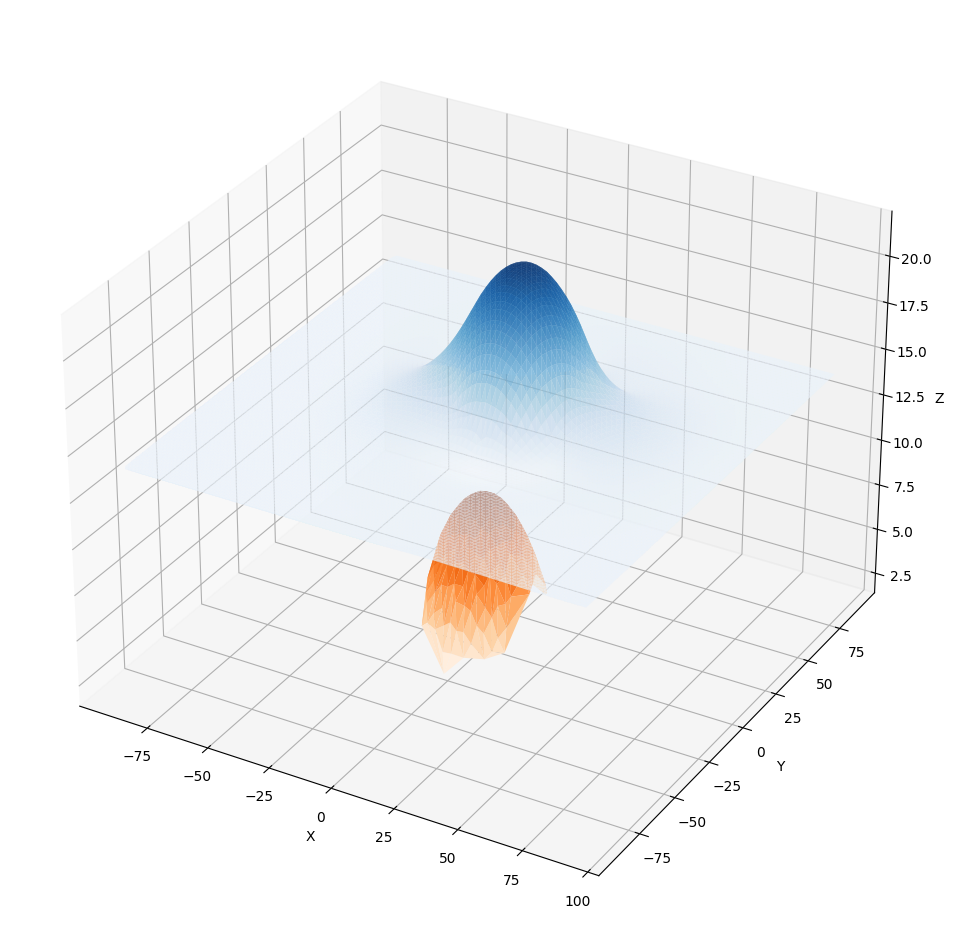

In [5]:
fig = plt.figure(figsize=(24, 12))
ax = plt.axes(projection='3d')


#ax.scatter3D(vertices["x"], vertices["y"], vertices["z"], c = vertices["z"], s = 16.0);

#fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Plot the surface.
surf_gags = ax.plot_trisurf(gags["x"], gags["y"], gags["z"], cmap="Oranges")
surf_vertices = ax.plot_trisurf(vertices["x"], vertices["y"], vertices["z"], cmap="Blues", alpha = 0.75)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

In [6]:
faces = pd.read_csv("face.csv", header = None)-1
faces.columns = ["x","y","z"]
faces

,x,y,z
0,91,92,0
1,92,1,0
2,92,93,1
3,93,2,1
4,93,94,2
...,...,...,...
18715,9551,9552,9461
18716,9461,9552,9462
18717,9552,9553,9462
18718,9462,9553,9463


In [7]:
mesh = tr.Trimesh(vertices.to_numpy(), faces.to_numpy())
mesh.show()

In [8]:
mesh = tr.Trimesh(-vertices.to_numpy(), faces.to_numpy())
mesh.show()

In [9]:
#Move membrane above the gag complex (-17 to +10)
#Add scaling constant k (0.01, +0.005 per iter)